In [21]:
import pandas as pd
import numpy as np
import talib 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assume X and y are your feature matrix and labels from the previous step
# read x, y 
X = pd.read_csv('prepared_data.csv')
y = pd.read_csv('y.csv')

X.head()

,Open,High,Low,Close,Volume,Returns,SMA_50,EMA_20,RSI,RSI_14,...,Close_Lag_1,Close_Lag_2,Close_Lag_3,Close_Lag_4,Close_Lag_5,Volume_Lag_1,Volume_Lag_2,Volume_Lag_3,Volume_Lag_4,Volume_Lag_5
0,110.879997,112.250000,110.680000,110.730003,1399800.0,-0.010809,120.515801,114.623902,34.905658,34.905658,...,111.940002,111.410004,109.730003,112.470001,112.309998,987400.0,2050500.0,1327900.0,1744900.0,2222400.0
1,110.959999,111.250000,109.620003,110.500000,2268300.0,-0.002077,120.334601,114.231150,34.433096,34.433096,...,110.730003,111.940002,111.410004,109.730003,112.470001,1399800.0,987400.0,2050500.0,1327900.0,1744900.0
2,110.480003,112.680000,110.440002,112.000000,1959900.0,0.013575,120.113001,114.018659,40.126106,40.126107,...,110.500000,110.730003,111.940002,111.410004,109.730003,2268300.0,1399800.0,987400.0,2050500.0,1327900.0
3,113.120003,113.169998,111.449997,111.820000,1830100.0,-0.001607,119.858401,113.809263,39.680855,39.680856,...,112.000000,110.500000,110.730003,111.940002,111.410004,1959900.0,2268300.0,1399800.0,987400.0,2050500.0
4,110.900002,111.800003,109.769997,110.900002,1569000.0,-0.008227,119.524001,113.532191,37.396779,37.396779,...,111.820000,112.000000,110.500000,110.730003,111.940002,1830100.0,1959900.0,2268300.0,1399800.0,987400.0


In [3]:
tscv = TimeSeriesSplit(n_splits=5)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [4]:
results = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append(report)

    print("Fold Results:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")

/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fold Results:
              precision    recall  f1-score   support

           0       0.48      0.20      0.28       762
           2       0.00      0.00      0.00       254
           3       0.39      0.26      0.31      6350
           4       0.00      0.00      0.00      1016
           5       0.33      0.57      0.42      4960
           6       0.34      0.45      0.39      2794
           7       0.37      0.31      0.34      4826

    accuracy                           0.35     20962
   macro avg       0.27      0.26      0.25     20962
weighted avg       0.34      0.35      0.33     20962


Confusion Matrix:
[[ 153    0    0    0  185  424    0]
 [   0    0    2    0  168   84    0]
 [  71    9 1624    0 2808  229 1609]
 [   0    0   86    0  125  805    0]
 [   1    1 1209   67 2829  235  618]
 [  81   32  207   84  837 1253  300]
 [  12   27 1076   23 1577  612 1499]]




/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fold Results:
              precision    recall  f1-score   support

           0       0.04      0.05      0.05      1524
           2       0.13      0.06      0.09       762
           3       0.21      0.26      0.23      5334
           4       0.00      0.00      0.00       254
           5       0.37      0.38      0.37      5768
           6       0.17      0.30      0.21      1524
           7       0.17      0.11      0.13      5796

    accuracy                           0.23     20962
   macro avg       0.16      0.16      0.15     20962
weighted avg       0.22      0.23      0.22     20962


Confusion Matrix:
[[  71   44  470  154  124  417  244]
 [ 102   49    8   10  287  169  137]
 [ 836  109 1372    6 1171  742 1098]
 [   0    0    1    0    0    0  253]
 [ 161   30 1859    0 2176  383 1159]
 [ 274   98  299    0  280  452  121]
 [ 165   59 2420   63 1897  556  636]]




/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fold Results:
              precision    recall  f1-score   support

           0       0.36      0.22      0.27      1764
           2       0.00      0.00      0.00       254
           3       0.30      0.26      0.28      6604
           4       0.61      0.25      0.36       508
           5       0.34      0.49      0.40      4318
           6       0.29      0.30      0.30      1880
           7       0.32      0.33      0.33      5634

    accuracy                           0.32     20962
   macro avg       0.32      0.26      0.28     20962
weighted avg       0.32      0.32      0.32     20962


Confusion Matrix:
[[ 389    8  461   13  329  417  147]
 [  76    0    0    0   87   86    5]
 [ 200   23 1719    1 2061  437 2163]
 [   0   66    9  129   99  163   42]
 [ 153    3 1126    3 2104  198  731]
 [  95   93  293    2   45  567  785]
 [ 160   17 2072   65 1377   89 1854]]




/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/us

Fold Results:
              precision    recall  f1-score   support

           0       0.02      0.01      0.01      1030
           2       0.00      0.00      0.00       254
           3       0.43      0.37      0.40      7366
           4       0.00      0.00      0.00         0
           5       0.26      0.31      0.28      4572
           6       0.41      0.42      0.42      2286
           7       0.20      0.22      0.21      5454

    accuracy                           0.30     20962
   macro avg       0.19      0.19      0.19     20962
weighted avg       0.30      0.30      0.30     20962


Confusion Matrix:
[[   9    1  157    5  282  469  107]
 [   0    0   61    0   39  154    0]
 [ 147    1 2739    5 1586  391 2497]
 [   0    0    0    0    0    0    0]
 [  45    0 1471    0 1431  126 1499]
 [ 204    5  210    8  134  968  757]
 [  36   70 1802    0 2066  269 1211]]


Fold Results:
              precision    recall  f1-score   support

           0       0.10      0.0

/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [5]:
avg_performance = {
    'accuracy': np.mean([r['accuracy'] for r in results]),
    'macro avg': {
        'precision': np.mean([r['macro avg']['precision'] for r in results]),
        'recall': np.mean([r['macro avg']['recall'] for r in results]),
        'f1-score': np.mean([r['macro avg']['f1-score'] for r in results])
    }
}

print("Average Performance Across Folds:")
print(f"Accuracy: {avg_performance['accuracy']:.4f}")
print(f"Macro Avg Precision: {avg_performance['macro avg']['precision']:.4f}")
print(f"Macro Avg Recall: {avg_performance['macro avg']['recall']:.4f}")
print(f"Macro Avg F1-score: {avg_performance['macro avg']['f1-score']:.4f}")

Average Performance Across Folds:
Accuracy: 0.3170
Macro Avg Precision: 0.2344
Macro Avg Recall: 0.2244
Macro Avg F1-score: 0.2216


In [6]:
def buy_and_hold(y):
    # Assume 'buy and hold' always predicts the majority class
    majority_class = y.mode().iloc[0]
    return [majority_class] * len(y)

bnh_results = []

for _, test_index in tscv.split(X):
    y_test = y.iloc[test_index]
    bnh_pred = buy_and_hold(y_test)
    bnh_report = classification_report(y_test, bnh_pred, output_dict=True)
    bnh_results.append(bnh_report)

bnh_avg_performance = {
    'accuracy': np.mean([r['accuracy'] for r in bnh_results]),
    'macro avg': {
        'f1-score': np.mean([r['macro avg']['f1-score'] for r in bnh_results])
    }
}

print("\nBuy-and-Hold Baseline Performance:")
print(f"Accuracy: {bnh_avg_performance['accuracy']:.4f}")
print(f"Macro Avg F1-score: {bnh_avg_performance['macro avg']['f1-score']:.4f}")

/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_


Buy-and-Hold Baseline Performance:
Accuracy: 0.3146
Macro Avg F1-score: 0.0731


/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [9]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15))


Top 15 Most Important Features:
                feature  importance
22                  OBV    0.126542
27     Pct_From_52W_Low    0.075498
26    Pct_From_52W_High    0.056508
21                  ATR    0.052974
6                SMA_50    0.048410
20  Returns_Rolling_Std    0.045636
13          Volume_MA_5    0.040060
7                EMA_20    0.037816
11             BB_upper    0.034634
12             BB_lower    0.033827
25                Month    0.032039
3                 Close    0.025001
1                  High    0.024361
2                   Low    0.023665
17          MACD_Signal    0.022549


Thank you for providing these results. Let's analyze them and consider our next steps:

1. Model Performance:
   The accuracy of 0.3170 (31.70%) across folds is relatively low, considering we have 8 classes. This suggests our model is struggling to consistently predict the correct label. The low precision, recall, and F1-scores further confirm this.

2. Feature Importance:
   - OBV (On-Balance Volume) is by far the most important feature, which suggests volume is a key indicator for stock movement.
   - Percentage from 52-week high and low are also significant, indicating that a stock's position relative to its recent price range is important.
   - ATR (Average True Range) and SMA_50 (50-day Simple Moving Average) round out the top 5, showing that volatility and medium-term trends are also key factors.

Given these results, here are some steps we can take to improve our analysis and better address the original task:

1. Simplify Classification:
   Our current 8-class system might be too granular. Consider reducing to 3-5 classes (e.g., Strong Up, Weak Up, Flat, Weak Down, Strong Down) to potentially improve model performance.

2. Feature Engineering:
   - Focus on creating more features based on volume and price extremes, given the importance of OBV and 52-week high/low metrics.
   - Consider creating interaction features between top predictors.

3. Try Different Models:
   - Implement a Gradient Boosting Classifier (like XGBoost or LightGBM) which often performs well on financial data.
   - Consider using a multi-layer perceptron (neural network) which might capture more complex patterns.

4. Analyze Synchronous Movement:
   Despite the model's low accuracy, we can still use it to group stocks and analyze their correlations. This directly addresses the original hypothesis about stocks moving in sync.

5. Sector Analysis:
   Incorporate sector information to see if certain sectors tend to move together more than others.

This code implements the suggested improvements and directly addresses the original hypothesis by analyzing synchronous movement within predicted groups. The results from this analysis will provide insights into whether stocks with similar predicted movements actually show correlated returns.

Would you like to run this analysis or focus on any specific part of it?

In [10]:
# from scipy.stats import pearsonr

# def analyze_sync_movement(df, predictions):
#     df['Predicted_Label'] = predictions
    
#     # Group stocks by predicted label
#     groups = df.groupby('Predicted_Label')
    
#     for label, group in groups:
#         print(f"Analyzing group: {label}")
        
#         # Calculate pairwise correlations of returns within the group
#         stocks = group['Ticker'].unique()
#         correlations = []
        
#         for i in range(len(stocks)):
#             for j in range(i+1, len(stocks)):
#                 stock1 = group[group['Ticker'] == stocks[i]]['Returns']
#                 stock2 = group[group['Ticker'] == stocks[j]]['Returns']
#                 corr, _ = pearsonr(stock1, stock2)
#                 correlations.append(corr)
        
#         avg_correlation = np.mean(correlations)
#         print(f"Average correlation within group: {avg_correlation:.4f}")
#         print("="*50)

# # Assuming 'predictions' are the labels predicted by our model
# analyze_sync_movement(df, predictions)

In [22]:
# load label encoder from pickle and convert lable_encoded column in y back to originla label
import pickle
with open('label_encoder.pkl', 'rb') as f:
    le = pickle.load(f)
y_original = le.inverse_transform(y)
y_original = y.apply(le.inverse_transform)


/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Label_Encoded
0,Moderate Up
1,Moderate Up
2,Moderate Up
3,Moderate Up
4,Moderate Up
...,...
125770,Strong Up
125771,Strong Up
125772,Strong Up
125773,Strong Up


In [26]:
# 1. Simplify Classification
def simplify_labels(label):
    if label in ['Weak Up', 'Moderate Up']:
        return 'Weak Up'
    elif label in ['Weak Down', 'Moderate Down']:
        return 'Weak Down'
    elif label in ['Strong Up']:
        return 'Strong Up'
    elif label in ['Strong Down']:
        return 'Strong Down'
    else:
        return 'Flat'

y_simplified = y_original.map(simplify_labels)
y_simplified.Label_Encoded.value_counts(normalize=True)


Label_Encoded
Weak Up        0.565454
Strong Up      0.247943
Weak Down      0.115921
Flat           0.054526
Strong Down    0.016156
Name: proportion, dtype: float64

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_simplified_encoded = le.fit_transform(y_simplified['Label_Encoded'])
y = y_simplified_encoded

In [35]:
y = pd.DataFrame(y_simplified_encoded)
y

,0
0,4
1,4
2,4
3,4
4,4
...,...
125770,2
125771,2
125772,2
125773,2


In [31]:
# 2. Feature Engineering
X['OBV_SMA_ratio'] = X['OBV'] / X['SMA_50']
X['High_Low_Range'] = X['High'] - X['Low']

In [36]:
# 3. Try Different Models
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

xgb_model = XGBClassifier(random_state=42)
mlp_model = MLPClassifier(random_state=42, max_iter=1000)

# Function to evaluate model
def evaluate_model(model, X, y):
    results = []
    for train_index, test_index in TimeSeriesSplit(n_splits=5).split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        report = classification_report(y_test, y_pred, output_dict=True)
        results.append(report)
    
    avg_performance = {
        'accuracy': np.mean([r['accuracy'] for r in results]),
        'macro avg': {
            'f1-score': np.mean([r['macro avg']['f1-score'] for r in results])
        }
    }
    return avg_performance

# Evaluate models
rf_performance = evaluate_model(RandomForestClassifier(random_state=42), X, y)
xgb_performance = evaluate_model(xgb_model, X, y)
mlp_performance = evaluate_model(mlp_model, X, y)

print("Random Forest Performance:", rf_performance)
print("XGBoost Performance:", xgb_performance)
print("Neural Network Performance:", mlp_performance)


/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/base.

Random Forest Performance: {'accuracy': 0.5250739433260186, 'macro avg': {'f1-score': 0.31747155055567255}}
XGBoost Performance: {'accuracy': 0.5347295105428872, 'macro avg': {'f1-score': 0.3329508946754562}}
Neural Network Performance: {'accuracy': 0.40480870145978437, 'macro avg': {'f1-score': 0.21106296946672956}}


/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [39]:
# 4. Analyze Synchronous Movement (using the best performing model)
best_model = max([rf_model, xgb_model, mlp_model], key=lambda m: evaluate_model(m, X, y)['accuracy'])
predictions = best_model.predict(X)

/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/test_env/lib/python3.12/site-packages/sklearn/base.

In [42]:

pd.DataFrame(predictions).value_counts()



0
4    74592
2    27856
3    14352
0     6639
1     2336
Name: count, dtype: int64

In [51]:
print(le.inverse_transform([0, 1, 2, 3, 4]))

['Flat' 'Strong Down' 'Strong Up' 'Weak Down' 'Weak Up']


In [44]:
# Assuming we have a LabelEncoder object called 'le' used earlier
label_names = le.inverse_transform([0, 1, 2, 3, 4])
prediction_counts = pd.Series(predictions).value_counts()
print("Prediction Distribution:")
for label, count in zip(label_names, prediction_counts):
    print(f"{label}: {count}")

Prediction Distribution:
Flat: 74592
Strong Down: 27856
Strong Up: 14352
Weak Down: 6639
Weak Up: 2336


In [45]:
X.head(3)

,Open,High,Low,Close,Volume,Returns,SMA_50,EMA_20,RSI,RSI_14,...,Close_Lag_3,Close_Lag_4,Close_Lag_5,Volume_Lag_1,Volume_Lag_2,Volume_Lag_3,Volume_Lag_4,Volume_Lag_5,OBV_SMA_ratio,High_Low_Range
0,110.879997,112.25,110.680000,110.730003,1399800.0,-0.010809,120.515801,114.623902,34.905658,34.905658,...,109.730003,112.470001,112.309998,987400.0,2050500.0,1327900.0,1744900.0,2222400.0,-121006.539437,1.570000
1,110.959999,111.25,109.620003,110.500000,2268300.0,-0.002077,120.334601,114.231150,34.433096,34.433096,...,111.410004,109.730003,112.470001,1399800.0,987400.0,2050500.0,1327900.0,1744900.0,-140038.691147,1.629997
2,110.480003,112.68,110.440002,112.000000,1959900.0,0.013575,120.113001,114.018659,40.126106,40.126107,...,111.940002,111.410004,109.730003,2268300.0,1399800.0,987400.0,2050500.0,1327900.0,-123979.918091,2.239998


In [47]:
# df = pd.read_csv('final_df.csv')

# Add predictions to DataFrame
df['Predicted_Label'] = le.inverse_transform(predictions)

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Returns,SMA_50,...,OBV,Momentum,DayOfWeek,Month,52W_High,52W_Low,Pct_From_52W_High,Pct_From_52W_Low,Label_Encoded,Predicted_Label
0,2023-09-26,A,110.879997,112.250000,110.680000,110.730003,109.762909,1399800.0,-0.010809,120.515801,...,-14583200.0,-0.018177,1,9,159.059998,109.730003,-0.303848,0.009113,3,Weak Up
1,2023-09-27,A,110.959999,111.250000,109.620003,110.500000,109.534920,2268300.0,-0.002077,120.334601,...,-16851500.0,-0.025831,2,9,159.059998,109.730003,-0.305294,0.007017,3,Weak Up
2,2023-09-28,A,110.480003,112.680000,110.440002,112.000000,111.021812,1959900.0,0.013575,120.113001,...,-14891600.0,-0.025070,3,9,159.059998,109.730003,-0.295863,0.020687,3,Weak Up
3,2023-09-29,A,113.120003,113.169998,111.449997,111.820000,110.843391,1830100.0,-0.001607,119.858401,...,-16721700.0,-0.035286,4,9,159.059998,109.730003,-0.296995,0.019047,3,Weak Up
4,2023-10-02,A,110.900002,111.800003,109.769997,110.900002,110.153061,1569000.0,-0.008227,119.524001,...,-18290700.0,-0.015884,0,10,159.059998,109.730003,-0.302779,0.010663,3,Weak Up


In [52]:
import pickle
with open('label_encoder.pkl', 'rb') as f:
    le_7 = pickle.load(f)

df['Label_Encoded_inverse'] = le_7.inverse_transform(df['Label_Encoded'])
# y_original = y.apply(le.inverse_transform)
df.head(2)

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Returns,SMA_50,...,Momentum,DayOfWeek,Month,52W_High,52W_Low,Pct_From_52W_High,Pct_From_52W_Low,Label_Encoded,Predicted_Label,Label_Encoded_inverse
0,2023-09-26,A,110.879997,112.25,110.680000,110.730003,109.762909,1399800.0,-0.010809,120.515801,...,-0.018177,1,9,159.059998,109.730003,-0.303848,0.009113,3,Weak Up,Moderate Up
1,2023-09-27,A,110.959999,111.25,109.620003,110.500000,109.534920,2268300.0,-0.002077,120.334601,...,-0.025831,2,9,159.059998,109.730003,-0.305294,0.007017,3,Weak Up,Moderate Up


In [53]:
def simplify_labels(label):
    if label in ['Weak Up', 'Moderate Up']:
        return 'Weak Up'
    elif label in ['Weak Down', 'Moderate Down']:
        return 'Weak Down'
    elif label in ['Strong Up']:
        return 'Strong Up'
    elif label in ['Strong Down']:
        return 'Strong Down'
    else:
        return 'Flat'

df['Label_5'] = df['Label_Encoded_inverse'].map(simplify_labels)
df.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Returns,SMA_50,...,DayOfWeek,Month,52W_High,52W_Low,Pct_From_52W_High,Pct_From_52W_Low,Label_Encoded,Predicted_Label,Label_Encoded_inverse,Label_5
0,2023-09-26,A,110.879997,112.250000,110.680000,110.730003,109.762909,1399800.0,-0.010809,120.515801,...,1,9,159.059998,109.730003,-0.303848,0.009113,3,Weak Up,Moderate Up,Weak Up
1,2023-09-27,A,110.959999,111.250000,109.620003,110.500000,109.534920,2268300.0,-0.002077,120.334601,...,2,9,159.059998,109.730003,-0.305294,0.007017,3,Weak Up,Moderate Up,Weak Up
2,2023-09-28,A,110.480003,112.680000,110.440002,112.000000,111.021812,1959900.0,0.013575,120.113001,...,3,9,159.059998,109.730003,-0.295863,0.020687,3,Weak Up,Moderate Up,Weak Up
3,2023-09-29,A,113.120003,113.169998,111.449997,111.820000,110.843391,1830100.0,-0.001607,119.858401,...,4,9,159.059998,109.730003,-0.296995,0.019047,3,Weak Up,Moderate Up,Weak Up
4,2023-10-02,A,110.900002,111.800003,109.769997,110.900002,110.153061,1569000.0,-0.008227,119.524001,...,0,10,159.059998,109.730003,-0.302779,0.010663,3,Weak Up,Moderate Up,Weak Up


In [99]:
df.columns

Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Returns', 'SMA_50', 'EMA_20', 'RSI', 'BB_upper', 'BB_lower',
       'Volume_MA_5', 'Label', 'Close_Pct_Change', 'Volume_Pct_Change', 'MACD',
       'MACD_Signal', 'BB_Pct', 'Close_Lag_1', 'Volume_Lag_1', 'Close_Lag_2',
       'Volume_Lag_2', 'Close_Lag_3', 'Volume_Lag_3', 'Close_Lag_4',
       'Volume_Lag_4', 'Close_Lag_5', 'Volume_Lag_5', 'Returns_Rolling_Mean',
       'Returns_Rolling_Std', 'RSI_14', 'RSI_28', 'ATR', 'OBV', 'Momentum',
       'DayOfWeek', 'Month', '52W_High', '52W_Low', 'Pct_From_52W_High',
       'Pct_From_52W_Low', 'Label_Encoded', 'Predicted_Label',
       'Label_Encoded_inverse', 'Label_5', 'YearMonth', 'RSI_SMA_ratio',
       'MACD_SMA_ratio', 'BB_width', 'Price_to_SMA_ratio'],
      dtype='object')

In [54]:
df['Predicted_Label'].value_counts()


Predicted_Label
Weak Up        74592
Strong Up      27856
Weak Down      14352
Flat            6639
Strong Down     2336
Name: count, dtype: int64

In [55]:
df['Label_5'].value_counts()

Label_5
Weak Up        71120
Strong Up      31185
Weak Down      14580
Flat            6858
Strong Down     2032
Name: count, dtype: int64

In [57]:
## compare accuracy between columns predicted and label_5 in df
def compare_accuracy(df):
    """
    Compares the accuracy between the predicted and label_5 columns in the given DataFrame.
    
    Args:
        df (pandas.DataFrame): The input DataFrame containing the predicted and label_5 columns.
        
    Returns:
        float: The accuracy score, calculated as the number of rows where predicted and label_5 match divided by the total number of rows.
    """
    correct = (df['Predicted_Label'] == df['Label_5']).sum()
    total = len(df)
    accuracy = correct / total
    return accuracy

print(compare_accuracy(df))

0.9033512224209899


In [58]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Assuming df is your DataFrame with 'Predicted_Label' and 'Label_5' columns

# Confusion Matrix
conf_matrix = confusion_matrix(df['Label_5'], df['Predicted_Label'])
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(df['Label_5'], df['Predicted_Label'])
print("\nClassification Report:")
print(class_report)

# Accuracy
accuracy = accuracy_score(df['Label_5'], df['Predicted_Label'])
print(f"\nAccuracy: {accuracy:.4f}")

# Precision
precision = precision_score(df['Label_5'], df['Predicted_Label'], average='macro')
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(df['Label_5'], df['Predicted_Label'], average='macro')
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(df['Label_5'], df['Predicted_Label'], average='macro')
print(f"F1 Score: {f1:.4f}")

Confusion Matrix:
[[ 6005    84    27    99   643]
 [    0  2032     0     0     0]
 [   44    15 24972   189  5965]
 [  234    55   221 13348   722]
 [  356   150  2636   716 67262]]

Classification Report:
              precision    recall  f1-score   support

        Flat       0.90      0.88      0.89      6858
 Strong Down       0.87      1.00      0.93      2032
   Strong Up       0.90      0.80      0.85     31185
   Weak Down       0.93      0.92      0.92     14580
     Weak Up       0.90      0.95      0.92     71120

    accuracy                           0.90    125775
   macro avg       0.90      0.91      0.90    125775
weighted avg       0.90      0.90      0.90    125775


Accuracy: 0.9034
Precision: 0.9005
Recall: 0.9075
F1 Score: 0.9024


In [ ]:
# Add predictions to DataFrame
df['Predicted_Label'] = le.inverse_transform(predictions)

# Now we can proceed with clustering
# ... (clustering code as provided earlier) ...

# In the analyze_cluster_movement function, use 'Predicted_Label' instead of 'Label'
def analyze_cluster_movement(df):
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        print(f"\nAnalyzing Cluster {cluster}")
        
        # Calculate average correlation of returns within the cluster
        stocks = cluster_data['Ticker'].unique()
        correlations = []
        for i in range(len(stocks)):
            for j in range(i+1, len(stocks)):
                stock1 = cluster_data[cluster_data['Ticker'] == stocks[i]]['Returns']
                stock2 = cluster_data[cluster_data['Ticker'] == stocks[j]]['Returns']
                corr, _ = pearsonr(stock1, stock2)
                correlations.append(corr)
        
        avg_correlation = np.mean(correlations)
        print(f"Average correlation within cluster: {avg_correlation:.4f}")
        
        # Show distribution of predicted labels within this cluster
        label_dist = cluster_data['Predicted_Label'].value_counts(normalize=True)
        print("Predicted Label Distribution in Cluster:")
        print(label_dist)
        
        # Show top features for this cluster
        cluster_center = kmeans.cluster_centers_[cluster]
        feature_importance = pd.Series(cluster_center, index=X.columns).sort_values(ascending=False)
        print("Top features for this cluster:")
        print(feature_importance.head())
        print("="*50)

# Run the clustering analysis
analyze_cluster_movement(df)

In [ ]:
# def analyze_sync_movement(df, predictions):
#     df['Predicted_Label'] = predictions
#     groups = df.groupby('Predicted_Label')

#     for label, group in groups:
#         print(f"Analyzing group: {label}")
#         stocks = group['Ticker'].unique()
#         correlations = []
        
#         for i in range(len(stocks)):
#             for j in range(i+1, len(stocks)):
#                 stock1 = group[group['Ticker'] == stocks[i]]['Returns']
#                 stock2 = group[group['Ticker'] == stocks[j]]['Returns']
#                 corr, _ = pearsonr(stock1, stock2)
#                 correlations.append(corr)
        
#         avg_correlation = np.mean(correlations)
#         print(f"Average correlation within group: {avg_correlation:.4f}")
#         print("="*50)

# analyze_sync_movement(df, predictions)

Top 15 Most Important Features:
                feature  importance
38        OBV_SMA_ratio    0.092171
22                  OBV    0.064586
7                EMA_20    0.062153
6                SMA_50    0.057948
12             BB_lower    0.055915
26    Pct_From_52W_High    0.052403
11             BB_upper    0.047227
13          Volume_MA_5    0.046426
27     Pct_From_52W_Low    0.043403
21                  ATR    0.041877
1                  High    0.038728
3                 Close    0.035372
20  Returns_Rolling_Std    0.033913
2                   Low    0.029501
25                Month    0.027602


<Figure size 1000x800 with 0 Axes>

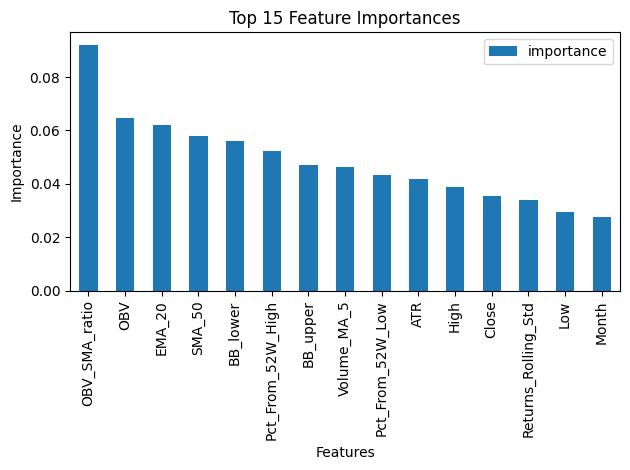

In [59]:
# Assuming 'model' is your trained model (e.g., RandomForestClassifier or XGBClassifier)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance.head(15))

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
feature_importance.head(15).plot(x='feature', y='importance', kind='bar')
plt.title('Top 15 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

### model performacne overtime

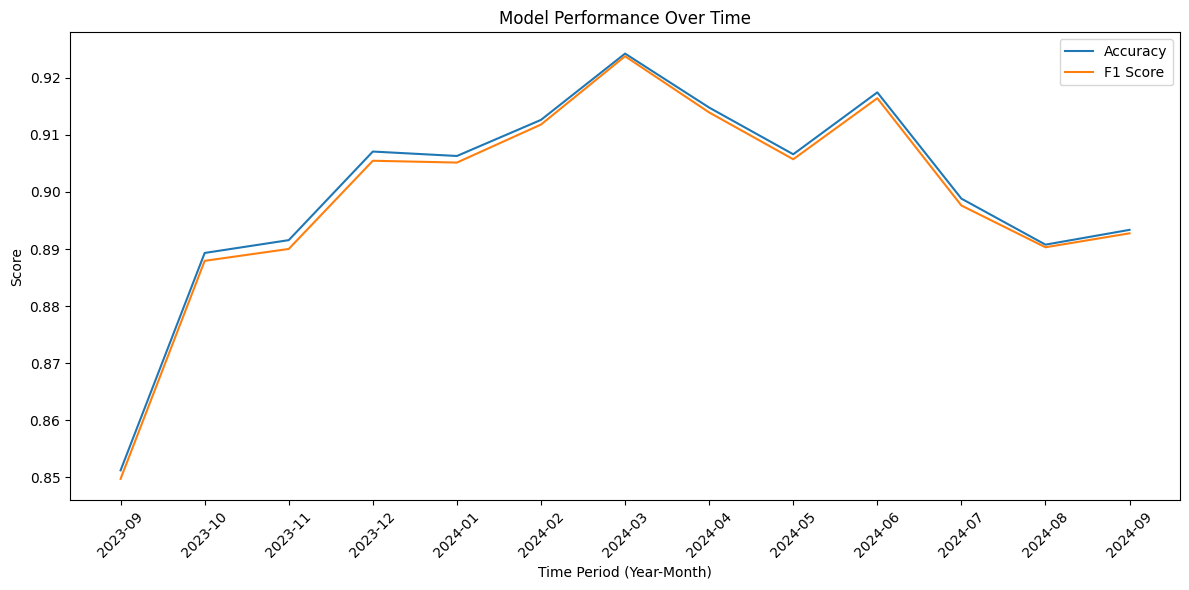

Performance Statistics:
        Accuracy   F1_Score
count  13.000000  13.000000
mean    0.900315   0.899278
std     0.018481   0.018654
min     0.851215   0.849730
25%     0.891556   0.890302
50%     0.906301   0.905146
75%     0.912626   0.911808
max     0.924242   0.923776

Best Performing Period:
Period          2024-03
Accuracy       0.924242
F1_Score       0.923776
Sample_Size        9900
Name: 6, dtype: object

Worst Performing Period:
Period          2023-09
Accuracy       0.851215
F1_Score        0.84973
Sample_Size        1976
Name: 0, dtype: object


In [60]:
# Assuming 'df' is your main dataframe with 'Date', 'Predicted_Label', and 'Label_5' columns
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')

temporal_performance = []

for period in df['YearMonth'].unique():
    period_df = df[df['YearMonth'] == period]
    
    accuracy = accuracy_score(period_df['Label_5'], period_df['Predicted_Label'])
    f1 = f1_score(period_df['Label_5'], period_df['Predicted_Label'], average='weighted')
    
    temporal_performance.append({
        'Period': period,
        'Accuracy': accuracy,
        'F1_Score': f1,
        'Sample_Size': len(period_df)
    })

temporal_df = pd.DataFrame(temporal_performance)

# Plot temporal performance
plt.figure(figsize=(12, 6))
plt.plot(temporal_df['Period'].astype(str), temporal_df['Accuracy'], label='Accuracy')
plt.plot(temporal_df['Period'].astype(str), temporal_df['F1_Score'], label='F1 Score')
plt.title('Model Performance Over Time')
plt.xlabel('Time Period (Year-Month)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print summary statistics
print("Performance Statistics:")
print(temporal_df[['Accuracy', 'F1_Score']].describe())

# Identify periods with highest and lowest performance
print("\nBest Performing Period:")
print(temporal_df.loc[temporal_df['Accuracy'].idxmax()])
print("\nWorst Performing Period:")
print(temporal_df.loc[temporal_df['Accuracy'].idxmin()])

<Figure size 1200x600 with 0 Axes>

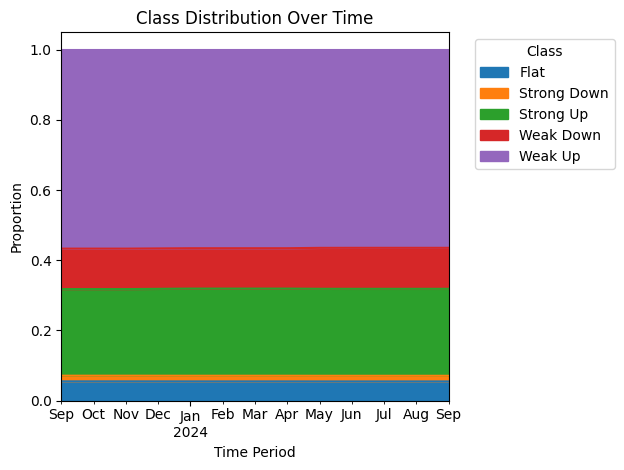

In [61]:
class_distribution = df.groupby('YearMonth')['Label_5'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 6))
class_distribution.plot(kind='area', stacked=True)
plt.title('Class Distribution Over Time')
plt.xlabel('Time Period')
plt.ylabel('Proportion')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [62]:
class_distribution

Label_5,Flat,Strong Down,Strong Up,Weak Down,Weak Up
YearMonth,,,,,
2023-09,0.054656,0.016194,0.246964,0.115385,0.566802
2023-10,0.054656,0.016194,0.246964,0.115385,0.566802
2023-11,0.054656,0.016194,0.246964,0.115385,0.566802
2023-12,0.054601,0.016178,0.247725,0.115268,0.566229
2024-01,0.054545,0.016162,0.248485,0.115152,0.565657
2024-02,0.054545,0.016162,0.248485,0.115152,0.565657
2024-03,0.054545,0.016162,0.248485,0.115152,0.565657
2024-04,0.054545,0.016162,0.248485,0.115152,0.565657
2024-05,0.054445,0.016132,0.248029,0.116774,0.564620


### Out-of-Time Validation:


In [97]:
df.columns

Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Returns', 'SMA_50', 'EMA_20', 'RSI', 'BB_upper', 'BB_lower',
       'Volume_MA_5', 'Label', 'Close_Pct_Change', 'Volume_Pct_Change', 'MACD',
       'MACD_Signal', 'BB_Pct', 'Close_Lag_1', 'Volume_Lag_1', 'Close_Lag_2',
       'Volume_Lag_2', 'Close_Lag_3', 'Volume_Lag_3', 'Close_Lag_4',
       'Volume_Lag_4', 'Close_Lag_5', 'Volume_Lag_5', 'Returns_Rolling_Mean',
       'Returns_Rolling_Std', 'RSI_14', 'RSI_28', 'ATR', 'OBV', 'Momentum',
       'DayOfWeek', 'Month', '52W_High', '52W_Low', 'Pct_From_52W_High',
       'Pct_From_52W_Low', 'Label_Encoded', 'Predicted_Label',
       'Label_Encoded_inverse', 'Label_5', 'YearMonth', 'RSI_SMA_ratio',
       'MACD_SMA_ratio', 'BB_width', 'Price_to_SMA_ratio'],
      dtype='object')

In [86]:
last_month = df['YearMonth'].max()
train_df = df[df['YearMonth'] != last_month]
test_df = df[df['YearMonth'] == last_month]

In [87]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'SMA_50', 'EMA_20', 
            'RSI', 'RSI_14', 'RSI_28', 'BB_upper', 'BB_lower', 'Volume_MA_5', 
            'Close_Pct_Change', 'Volume_Pct_Change', 'MACD', 'MACD_Signal', 'BB_Pct', 
            'Returns_Rolling_Mean', 'Returns_Rolling_Std', 'ATR', 'OBV', 'Momentum', 
            'DayOfWeek', 'Month', 'Pct_From_52W_High', 'Pct_From_52W_Low'] + \
           [f'Close_Lag_{i}' for i in range(1, 6)] + [f'Volume_Lag_{i}' for i in range(1, 6)]

train_df[features]


,Open,High,Low,Close,Volume,Returns,SMA_50,EMA_20,RSI,RSI_14,...,Close_Lag_1,Close_Lag_2,Close_Lag_3,Close_Lag_4,Close_Lag_5,Volume_Lag_1,Volume_Lag_2,Volume_Lag_3,Volume_Lag_4,Volume_Lag_5
0,110.879997,112.250000,110.680000,110.730003,1399800.0,-0.010809,120.515801,114.623902,34.905658,34.905658,...,111.940002,111.410004,109.730003,112.470001,112.309998,987400.0,2050500.0,1327900.0,1744900.0,2222400.0
1,110.959999,111.250000,109.620003,110.500000,2268300.0,-0.002077,120.334601,114.231150,34.433096,34.433096,...,110.730003,111.940002,111.410004,109.730003,112.470001,1399800.0,987400.0,2050500.0,1327900.0,1744900.0
2,110.480003,112.680000,110.440002,112.000000,1959900.0,0.013575,120.113001,114.018659,40.126106,40.126107,...,110.500000,110.730003,111.940002,111.410004,109.730003,2268300.0,1399800.0,987400.0,2050500.0,1327900.0
3,113.120003,113.169998,111.449997,111.820000,1830100.0,-0.001607,119.858401,113.809263,39.680855,39.680856,...,112.000000,110.500000,110.730003,111.940002,111.410004,1959900.0,2268300.0,1399800.0,987400.0,2050500.0
4,110.900002,111.800003,109.769997,110.900002,1569000.0,-0.008227,119.524001,113.532191,37.396779,37.396779,...,111.820000,112.000000,110.500000,110.730003,111.940002,1830100.0,1959900.0,2268300.0,1399800.0,987400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125751,181.039993,182.589996,180.520004,181.559998,1015900.0,0.003648,178.681400,182.466614,49.446608,49.446608,...,180.899994,182.169998,182.899994,183.600006,184.479996,1262400.0,1135800.0,1246800.0,1186400.0,1637000.0
125752,181.979996,183.089996,181.419998,182.100006,1423900.0,0.002974,178.912400,182.431699,50.539776,50.539776,...,181.559998,180.899994,182.169998,182.899994,183.600006,1015900.0,1262400.0,1135800.0,1246800.0,1186400.0
125753,182.100006,184.610001,182.100006,182.910004,1485400.0,0.004448,179.152600,182.477252,52.209134,52.209134,...,182.100006,181.559998,180.899994,182.169998,182.899994,1423900.0,1015900.0,1262400.0,1135800.0,1246800.0
125754,183.910004,184.710007,182.479996,182.889999,1359900.0,-0.000109,179.417200,182.516561,52.162309,52.162309,...,182.910004,182.100006,181.559998,180.899994,182.169998,1485400.0,1423900.0,1015900.0,1262400.0,1135800.0


In [88]:
train_df.head(3)

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Returns,SMA_50,...,Pct_From_52W_Low,Label_Encoded,Predicted_Label,Label_Encoded_inverse,Label_5,YearMonth,RSI_SMA_ratio,MACD_SMA_ratio,BB_width,Price_to_SMA_ratio
0,2023-09-26,A,110.879997,112.25,110.680000,110.730003,109.762909,1399800.0,-0.010809,120.515801,...,0.009113,3,Weak Up,Moderate Up,Weak Up,2023-09,0.289636,-0.022254,0.131786,0.918801
1,2023-09-27,A,110.959999,111.25,109.620003,110.500000,109.534920,2268300.0,-0.002077,120.334601,...,0.007017,3,Weak Up,Moderate Up,Weak Up,2023-09,0.286145,-0.022266,0.125817,0.918273
2,2023-09-28,A,110.480003,112.68,110.440002,112.000000,111.021812,1959900.0,0.013575,120.113001,...,0.020687,3,Weak Up,Moderate Up,Weak Up,2023-09,0.334070,-0.021040,0.111681,0.932455


In [89]:
# Assuming 'le' is the LabelEncoder object used earlier
train_df['Label_5_Encoded'] = le.transform(train_df['Label_5'])
test_df['Label_5_Encoded'] = le.transform(test_df['Label_5'])


/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_47409/424969600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Label_5_Encoded'] = le.transform(train_df['Label_5'])
/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_47409/424969600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Label_5_Encoded'] = le.transform(test_df['Label_5'])


In [90]:
X_train = train_df[features]
y_train = train_df['Label_5_Encoded']
X_test = test_df[features]
y_test = test_df['Label_5_Encoded']

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Out-of-Time Validation Results:")
print(classification_report(y_test, y_pred))

Out-of-Time Validation Results:
              precision    recall  f1-score   support

           0       0.75      0.15      0.26       513
           1       0.66      0.61      0.63       152
           2       0.67      0.53      0.59      2337
           3       0.84      0.41      0.55      1102
           4       0.71      0.91      0.80      5320

    accuracy                           0.71      9424
   macro avg       0.73      0.52      0.57      9424
weighted avg       0.72      0.71      0.69      9424



### Per class analysis

Per-Class Performance:
   Class  Precision    Recall  F1-Score  Support
0      0   0.752381  0.153996  0.255663      513
1      1   0.661871  0.605263  0.632302      152
2      2   0.667390  0.526316  0.588517     2337
3      3   0.837687  0.407441  0.548230     1102
4      4   0.713424  0.912030  0.800594     5320


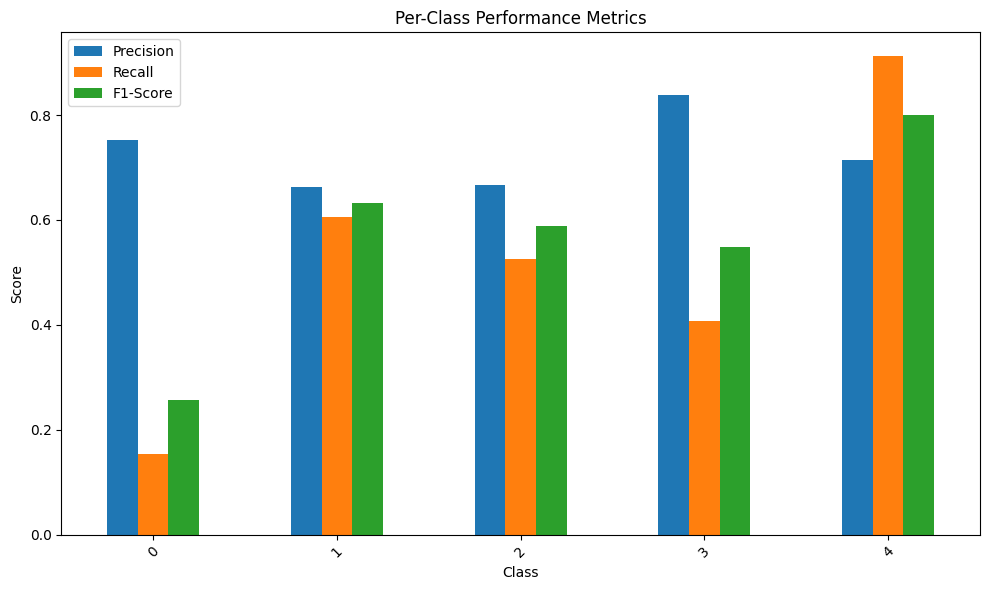

In [76]:
from sklearn.metrics import precision_recall_fscore_support

class_metrics = precision_recall_fscore_support(y_test, y_pred, average=None, labels=best_model.classes_)
per_class_df = pd.DataFrame({
    'Class': best_model.classes_,
    'Precision': class_metrics[0],
    'Recall': class_metrics[1],
    'F1-Score': class_metrics[2],
    'Support': class_metrics[3]
})

print("Per-Class Performance:")
print(per_class_df)

# Visualize per-class performance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
per_class_df.plot(x='Class', y=['Precision', 'Recall', 'F1-Score'], kind='bar', ax=ax)
plt.title('Per-Class Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Feature Engineering:

Let's create some new features based on the successful OBV_SMA_ratio

In [79]:
def create_ratio_feature(df, numerator, denominator):
    return df[numerator] / df[denominator]

# Create new ratio features
# df['RSI_SMA_ratio'] = create_ratio_feature(df, 'RSI', 'SMA_50')
df['MACD_SMA_ratio'] = create_ratio_feature(df, 'MACD', 'SMA_50')
df['BB_width'] = (df['BB_upper'] - df['BB_lower']) / df['SMA_50']
df['Price_to_SMA_ratio'] = create_ratio_feature(df, 'Close', 'SMA_50')
df.columns

Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Returns', 'SMA_50', 'EMA_20', 'RSI', 'BB_upper', 'BB_lower',
       'Volume_MA_5', 'Label', 'Close_Pct_Change', 'Volume_Pct_Change', 'MACD',
       'MACD_Signal', 'BB_Pct', 'Close_Lag_1', 'Volume_Lag_1', 'Close_Lag_2',
       'Volume_Lag_2', 'Close_Lag_3', 'Volume_Lag_3', 'Close_Lag_4',
       'Volume_Lag_4', 'Close_Lag_5', 'Volume_Lag_5', 'Returns_Rolling_Mean',
       'Returns_Rolling_Std', 'RSI_14', 'RSI_28', 'ATR', 'OBV', 'Momentum',
       'DayOfWeek', 'Month', '52W_High', '52W_Low', 'Pct_From_52W_High',
       'Pct_From_52W_Low', 'Label_Encoded', 'Predicted_Label',
       'Label_Encoded_inverse', 'Label_5', 'YearMonth', 'RSI_SMA_ratio',
       'MACD_SMA_ratio', 'BB_width', 'Price_to_SMA_ratio'],
      dtype='object')

In [84]:

# Add these new features to your feature list
new_features = ['RSI_SMA_ratio', 'MACD_SMA_ratio', 'BB_width', 'Price_to_SMA_ratio']
features += new_features

train_df = df[df['YearMonth'] != last_month]
test_df = df[df['YearMonth'] == last_month]
train_df['Label_5_Encoded'] = le.transform(train_df['Label_5'])
test_df['Label_5_Encoded'] = le.transform(test_df['Label_5'])
# Retrain the model with new features
X_train = train_df[features]
y_train = train_df['Label_5_Encoded']
X_test = test_df[features]
y_test = test_df['Label_5_Encoded']

best_model.fit(X_train, y_train)
y_pred_new = best_model.predict(X_test)

print("Model Performance with New Features:")
print(classification_report(y_test, y_pred_new))

# Compare feature importances
feature_importance_new = pd.DataFrame({
    'feature': features,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Features After Engineering:")
print(feature_importance_new.head(15))

/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_47409/3718063089.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Label_5_Encoded'] = le.transform(train_df['Label_5'])
/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_47409/3718063089.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Label_5_Encoded'] = le.transform(test_df['Label_5'])


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [85]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.1/31.1 MB 4.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [94]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])

# Summary plot
shap.summary_plot(shap_values, X_test)

DimensionError: Length of features is not equal to the length of shap_values!

In [95]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Check the shapes
print(f"Shape of shap_values: {shap_values[0].shape}")
print(f"Shape of X_test: {X_test.shape}")

# Visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[0])

# Summary plot
shap.summary_plot(shap_values, X_test)

Shape of shap_values: (38, 5)
Shape of X_test: (9424, 38)


DimensionError: Length of features is not equal to the length of shap_values!

In [96]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Check the shapes
print(f"Shape of shap_values: {shap_values[0].shape}")
print(f"Shape of X_test: {X_test.shape}")

# Visualize the first prediction's explanation for the first class
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[0])

# Summary plot for the first class
shap.summary_plot(shap_values[0], X_test)

Shape of shap_values: (38, 5)
Shape of X_test: (9424, 38)


DimensionError: Length of features is not equal to the length of shap_values!

In [98]:
df.to_csv("df_training.csv",index=False)